In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  3648 non-null   int64  
 1   Unnamed: 0    3648 non-null   object 
 2   Australia     3648 non-null   float64
 3   Europe        3648 non-null   float64
 4   Brazil        3648 non-null   float64
 5   Canada        3648 non-null   float64
 6   China         3648 non-null   float64
 7   Denmark       3648 non-null   float64
 8   Hong Kong     3648 non-null   float64
 9   India         3648 non-null   float64
 10  Japan         3648 non-null   float64
 11  Malaysia      3648 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 342.1+ KB


In [3]:
data.head(20)

,Unnamed: 0.1,Unnamed: 0,Australia,Europe,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Malaysia
0,0,2010-01-04,0.9133,1.4419,1.7200,1.0377,6.8273,5.1597,7.7555,46.27,92.55,3.3960
1,1,2010-01-05,0.9143,1.4402,1.7296,1.0371,6.8258,5.1668,7.7564,46.13,91.48,3.3850
2,2,2010-01-06,0.9189,1.4404,1.7292,1.0333,6.8272,5.1638,7.7546,45.72,92.53,3.3790
3,3,2010-01-07,0.9168,1.4314,1.7409,1.0351,6.8280,5.1981,7.7539,45.67,93.31,3.3680
4,4,2010-01-08,0.9218,1.4357,1.7342,1.0345,6.8274,5.1827,7.7553,45.50,92.70,3.3750
5,5,2010-01-09,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00,0.0000
6,6,2010-01-10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00,0.0000
7,7,2010-01-11,0.9295,1.4536,1.7330,1.0317,6.8263,5.1185,7.7550,45.35,91.90,3.3350
8,8,2010-01-12,0.9242,1.4523,1.7407,1.0374,6.8267,5.1232,7.7552,45.60,90.95,3.3425
9,9,2010-01-13,0.9225,1.4492,1.7480,1.0319,6.8295,5.1336,7.7564,45.47,91.38,3.3445


In [4]:
data.tail(1)

,Unnamed: 0.1,Unnamed: 0,Australia,Europe,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Malaysia
3647,3648,2019-12-31,0.703,1.1227,4.019,1.2962,6.9618,6.6554,7.7894,71.36,108.67,4.0918


In [5]:
data.drop("Unnamed: 0.1", inplace = True, axis = 1)
data.columns

Index(['Unnamed: 0', 'Australia', 'Europe', 'Brazil', 'Canada', 'China',
       'Denmark', 'Hong Kong', 'India', 'Japan', 'Malaysia'],
      dtype='object')

In [6]:
data.columns = [
    "Date",
    "Australia",
    "Europe",
    "Brazil",
    "Canada",
    "China",
    "Denmark",
    "Hong Kong",
    "India",
    "Japan",
    "Malaysia"
]

idx = pd.date_range("2010-01-04", "2019-12-31")
data["Date"] = pd.to_datetime(data["Date"])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3648 non-null   datetime64[ns]
 1   Australia  3648 non-null   float64       
 2   Europe     3648 non-null   float64       
 3   Brazil     3648 non-null   float64       
 4   Canada     3648 non-null   float64       
 5   China      3648 non-null   float64       
 6   Denmark    3648 non-null   float64       
 7   Hong Kong  3648 non-null   float64       
 8   India      3648 non-null   float64       
 9   Japan      3648 non-null   float64       
 10  Malaysia   3648 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 313.6 KB


In [7]:
data.set_index("Date", inplace = True)

data = data.reindex(idx, fill_value=0)

data.replace(0, np.nan, inplace=True)

data

,Australia,Europe,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Malaysia
2010-01-04,0.9133,1.4419,1.7200,1.0377,6.8273,5.1597,7.7555,46.27,92.55,3.3960
2010-01-05,0.9143,1.4402,1.7296,1.0371,6.8258,5.1668,7.7564,46.13,91.48,3.3850
2010-01-06,0.9189,1.4404,1.7292,1.0333,6.8272,5.1638,7.7546,45.72,92.53,3.3790
2010-01-07,0.9168,1.4314,1.7409,1.0351,6.8280,5.1981,7.7539,45.67,93.31,3.3680
2010-01-08,0.9218,1.4357,1.7342,1.0345,6.8274,5.1827,7.7553,45.50,92.70,3.3750
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.6978,1.1174,4.0507,1.3073,6.9954,6.6829,7.7874,71.45,109.47,4.1260
2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-30,0.7004,1.1217,4.0152,1.3058,6.9864,6.6589,7.7857,71.30,108.85,4.1053


In [8]:
data.interpolate(method="linear",limit_direction="forward", inplace = True)

data

,Australia,Europe,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Malaysia
2010-01-04,0.913300,1.441900,1.720000,1.0377,6.8273,5.1597,7.755500,46.27,92.550000,3.3960
2010-01-05,0.914300,1.440200,1.729600,1.0371,6.8258,5.1668,7.756400,46.13,91.480000,3.3850
2010-01-06,0.918900,1.440400,1.729200,1.0333,6.8272,5.1638,7.754600,45.72,92.530000,3.3790
2010-01-07,0.916800,1.431400,1.740900,1.0351,6.8280,5.1981,7.753900,45.67,93.310000,3.3680
2010-01-08,0.921800,1.435700,1.734200,1.0345,6.8274,5.1827,7.755300,45.50,92.700000,3.3750
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.697800,1.117400,4.050700,1.3073,6.9954,6.6829,7.787400,71.45,109.470000,4.1260
2019-12-28,0.698667,1.118833,4.038867,1.3068,6.9924,6.6749,7.786833,71.40,109.263333,4.1191
2019-12-29,0.699533,1.120267,4.027033,1.3063,6.9894,6.6669,7.786267,71.35,109.056667,4.1122
2019-12-30,0.700400,1.121700,4.015200,1.3058,6.9864,6.6589,7.785700,71.30,108.850000,4.1053


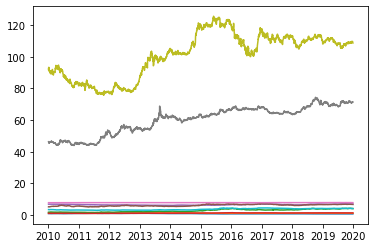

In [9]:
for i in data.columns:
    plt.plot(data[i])
plt.show()

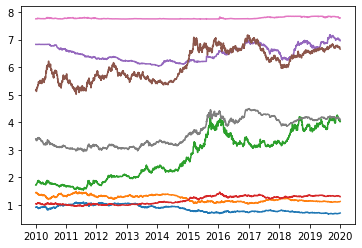

In [10]:
ignore_cols = ["India", "Japan"]
for i in data.columns:
    if i not in ignore_cols:
        plt.plot(data[i])
plt.show()

In [11]:
d_norm = pd.DataFrame([])

sclr = MinMaxScaler(feature_range=(0, 1))
d_norm = sclr.fit_transform(data)
d_norm = pd.DataFrame(d_norm)

In [12]:
d_norm.columns = data.columns

In [13]:
d_norm

,Australia,Europe,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Malaysia
0,0.562616,0.898667,0.067049,0.180599,0.691409,0.068305,0.061630,0.077884,0.337545,0.294419
1,0.564926,0.894889,0.070576,0.179432,0.690091,0.071604,0.070577,0.073283,0.316085,0.287364
2,0.575555,0.895333,0.070429,0.172045,0.691321,0.070210,0.052684,0.059809,0.337144,0.283515
3,0.570702,0.875333,0.074727,0.175544,0.692024,0.086148,0.045726,0.058166,0.352788,0.276459
4,0.582255,0.884889,0.072266,0.174378,0.691497,0.078993,0.059642,0.052580,0.340554,0.280949
...,...,...,...,...,...,...,...,...,...,...
3644,0.064695,0.177556,0.923326,0.704705,0.839072,0.776079,0.378728,0.905357,0.676895,0.762668
3645,0.066697,0.180741,0.918978,0.703733,0.836437,0.772362,0.373095,0.903713,0.672750,0.758242
3646,0.068700,0.183926,0.914631,0.702760,0.833802,0.768645,0.367462,0.902070,0.668605,0.753817
3647,0.070702,0.187111,0.910283,0.701788,0.831167,0.764927,0.361829,0.900427,0.664460,0.749391


In [14]:
d_norm.set_index(idx, inplace=True)
d_norm


,Australia,Europe,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Malaysia
2010-01-04,0.562616,0.898667,0.067049,0.180599,0.691409,0.068305,0.061630,0.077884,0.337545,0.294419
2010-01-05,0.564926,0.894889,0.070576,0.179432,0.690091,0.071604,0.070577,0.073283,0.316085,0.287364
2010-01-06,0.575555,0.895333,0.070429,0.172045,0.691321,0.070210,0.052684,0.059809,0.337144,0.283515
2010-01-07,0.570702,0.875333,0.074727,0.175544,0.692024,0.086148,0.045726,0.058166,0.352788,0.276459
2010-01-08,0.582255,0.884889,0.072266,0.174378,0.691497,0.078993,0.059642,0.052580,0.340554,0.280949
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.064695,0.177556,0.923326,0.704705,0.839072,0.776079,0.378728,0.905357,0.676895,0.762668
2019-12-28,0.066697,0.180741,0.918978,0.703733,0.836437,0.772362,0.373095,0.903713,0.672750,0.758242
2019-12-29,0.068700,0.183926,0.914631,0.702760,0.833802,0.768645,0.367462,0.902070,0.668605,0.753817
2019-12-30,0.070702,0.187111,0.910283,0.701788,0.831167,0.764927,0.361829,0.900427,0.664460,0.749391


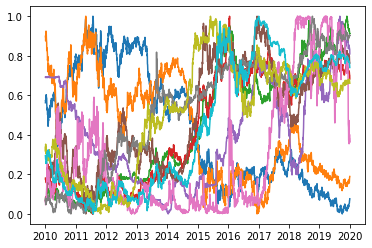

In [15]:
for i in d_norm.columns:
    plt.plot(d_norm[i])
plt.show()

In [16]:
d_norm_week = pd.DataFrame([])
d_norm_month = pd.DataFrame([])
d_norm_quarter = pd.DataFrame([])
d_norm_sem = pd.DataFrame([])
d_norm_year = pd.DataFrame([])
d_norm_lin = pd.DataFrame([])

In [17]:
for i in d_norm.columns:
    d_norm_week[i] = d_norm[i].rolling(7,center=True, method = "single").mean()
    d_norm_month[i] = d_norm[i].rolling(30,center=True, method = "single").mean()
    d_norm_quarter[i] = d_norm[i].rolling(90,center=True, method = "single").mean()
    d_norm_sem[i] = d_norm[i].rolling(182,center=True, method = "single").mean()
    d_norm_year[i] = d_norm[i].rolling(365,center=True, method = "single").mean()
    d_norm_lin[i] = d_norm[i]

In [18]:
d_norm_lin.loc[1:-1,:] = np.nan

/tmp/ipykernel_35865/2445250432.py:1: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  d_norm_lin.loc[1:-1,:] = np.nan


In [19]:
d_norm_lin.interpolate(method="linear",limit_direction="forward", inplace = True)


In [20]:
d_norm_week = d_norm_week.iloc[185:-185,:]
d_norm_month = d_norm_month.iloc[185:-185,:]
d_norm_quarter = d_norm_quarter.iloc[185:-185,:]
d_norm_sem = d_norm_sem.iloc[185:-185,:]
d_norm_year = d_norm_year.iloc[185:-185,:]
d_norm_lin = d_norm_lin.iloc[185:-185,:]
d_norm = d_norm.iloc[185:-185,:]

In [21]:
d_cov = pd.DataFrame([])
d_cov["linear"] = [d_norm[i].cov(d_norm_lin[i]) for i in d_norm.columns] 
d_cov["week"] = [d_norm[i].cov(d_norm_week[i]) for i in d_norm.columns] 
d_cov["month"] = [d_norm[i].cov(d_norm_month[i]) for i in d_norm.columns] 
d_cov["quarter"] = [d_norm[i].cov(d_norm_quarter[i]) for i in d_norm.columns] 
d_cov["semester"] = [d_norm[i].cov(d_norm_sem[i]) for i in d_norm.columns] 
d_cov["year"] = [d_norm[i].cov(d_norm_year[i]) for i in d_norm.columns] 


In [22]:
d_cov.index = d_norm.columns

In [23]:
d_cov

,linear,week,month,quarter,semester,year
Australia,0.032785,0.086583,0.086224,0.085413,0.084192,0.082067
Europe,0.035128,0.062338,0.061881,0.060777,0.059140,0.055755
Brazil,0.059382,0.085995,0.085805,0.085203,0.084320,0.082610
Canada,0.032821,0.078293,0.078038,0.077406,0.076381,0.074811
China,0.003083,0.051361,0.051110,0.050233,0.048624,0.045345
Denmark,0.035014,0.066033,0.065554,0.064428,0.062693,0.059135
Hong Kong,0.016634,0.102308,0.101060,0.098496,0.095331,0.090450
India,0.052512,0.070347,0.070186,0.069688,0.069009,0.067579
Japan,0.019383,0.085088,0.084815,0.084040,0.082635,0.079271
Malaysia,0.033309,0.106898,0.106643,0.105858,0.104458,0.101316


In [24]:
d_noise = pd.DataFrame([])

d_noise["linear"] = [mean_squared_error(d_norm[i],d_norm_lin[i]) for i in d_norm.columns]
d_noise["week"] = [mean_squared_error(d_norm[i],d_norm_week[i]) for i in d_norm.columns]
d_noise["month"] = [mean_squared_error(d_norm[i],d_norm_month[i]) for i in d_norm.columns]
d_noise["quarter"] = [mean_squared_error(d_norm[i],d_norm_quarter[i]) for i in d_norm.columns]
d_noise["semester"] = [mean_squared_error(d_norm[i],d_norm_sem[i]) for i in d_norm.columns]
d_noise["year"] = [mean_squared_error(d_norm[i],d_norm_year[i]) for i in d_norm.columns]

In [30]:
d_noise.set_index(d_norm.columns, inplace=True)

In [51]:
d_noise = d_noise[["week", "month", "quarter","semester", "year", "linear"]]
d_noise

,week,month,quarter,semester,year,linear
Australia,0.000062,0.000301,0.000827,0.001703,0.002944,0.053752
Europe,0.000081,0.000399,0.001140,0.002104,0.004035,0.038462
Brazil,0.000037,0.000150,0.000504,0.001041,0.001935,0.017830
Canada,0.000045,0.000211,0.000582,0.001401,0.002382,0.029720
China,0.000034,0.000173,0.000571,0.001631,0.004786,0.193614
Denmark,0.000085,0.000423,0.001153,0.002186,0.004300,0.036407
Hong Kong,0.000254,0.001205,0.002971,0.005353,0.009115,0.079843
India,0.000032,0.000133,0.000466,0.000934,0.001949,0.013385
Japan,0.000049,0.000234,0.000679,0.001315,0.003254,0.053669
Malaysia,0.000034,0.000186,0.000600,0.001338,0.003565,0.060164


In [55]:
def order(data, asc=True):
    ord = pd.DataFrame([])
    for i in data.columns:
        ord[i] = data[i].sort_values(ascending=asc).index
    return ord

In [54]:
noise_order = order(d_noise)

In [56]:
noise_order

,week,month,quarter,semester,year,linear
0,India,India,India,India,Brazil,India
1,Malaysia,Brazil,Brazil,Brazil,India,Brazil
2,China,China,China,Japan,Canada,Canada
3,Brazil,Malaysia,Canada,Malaysia,Australia,Denmark
4,Canada,Canada,Malaysia,Canada,Japan,Europe
5,Japan,Japan,Japan,China,Malaysia,Japan
6,Australia,Australia,Australia,Australia,Europe,Australia
7,Europe,Europe,Europe,Europe,Denmark,Malaysia
8,Denmark,Denmark,Denmark,Denmark,China,Hong Kong
9,Hong Kong,Hong Kong,Hong Kong,Hong Kong,Hong Kong,China


To do:
* Find the covariance between the rolling means and the normalized values
* tabulate
* Import the collected results from the json files
* tabulate
* Compare the covariances and the results and attempt to find correlations, and how the usage of the various networks

In [32]:
res = pd.read_json("./models/results.json")
res

,FNN,RNN,LSTM,GRU,Transformer,1D_CNN,CNN+RNN
Australia,"{'MSE': 0.0029981518937000004, 'MAE': 0.045037...","{'MSE': 0.0004887618524590001, 'MAE': 0.017137...","{'MSE': 0.001299206799943, 'MAE': 0.0286403873...","{'MSE': 0.000832997287033, 'MAE': 0.0223790331...","{'MSE': 0.059590412912455, 'MAE': 0.2306299515...","{'MSE': 0.001960460335723, 'MAE': 0.0346666693...","{'MSE': 0.001346755697774, 'MAE': 0.0284482700..."
Europe,"{'MSE': 0.0035586319664240003, 'MAE': 0.051877...","{'MSE': 0.0008157604707200001, 'MAE': 0.021435...","{'MSE': 0.0007135219320770001, 'MAE': 0.020906...","{'MSE': 0.000205091129271, 'MAE': 0.0105885575...","{'MSE': 0.027988019106414002, 'MAE': 0.1507378...","{'MSE': 0.000764333914717, 'MAE': 0.0213268921...","{'MSE': 0.0008588327525230001, 'MAE': 0.023282..."
Brazil,"{'MSE': 0.022593362879311, 'MAE': 0.1472812166...","{'MSE': 0.015799280175208, 'MAE': 0.1210656324...","{'MSE': 0.0022144087578430003, 'MAE': 0.037974...","{'MSE': 0.00157204911056, 'MAE': 0.03181794523...","{'MSE': 0.412136197997493, 'MAE': 0.6342432248...","{'MSE': 0.011614261156072002, 'MAE': 0.1024530...","{'MSE': 0.002073269063539, 'MAE': 0.0382541671..."
Canada,"{'MSE': 0.040059144278157, 'MAE': 0.1991659529...","{'MSE': 0.011886289034334, 'MAE': 0.1081225038...","{'MSE': 0.0012373970482520002, 'MAE': 0.030549...","{'MSE': 0.002005097775716, 'MAE': 0.0411721417...","{'MSE': 0.20471589749246502, 'MAE': 0.44757747...","{'MSE': 0.017572934713701003, 'MAE': 0.1303605...","{'MSE': 0.0030116806180590003, 'MAE': 0.051409..."
China,"{'MSE': 0.025193244457981, 'MAE': 0.1457381159...","{'MSE': 0.007274679677045001, 'MAE': 0.0756050...","{'MSE': 0.007704148347095, 'MAE': 0.0716663953...","{'MSE': 0.0039297546557830005, 'MAE': 0.051984...","{'MSE': 0.174107645444699, 'MAE': 0.3636408802...","{'MSE': 0.015773292500138, 'MAE': 0.1129368751...","{'MSE': 0.0075168279313710005, 'MAE': 0.073352..."
Denmark,"{'MSE': 0.027632209560659003, 'MAE': 0.1630893...","{'MSE': 0.016265892788388, 'MAE': 0.1250843047...","{'MSE': 0.0015996754754820002, 'MAE': 0.033974...","{'MSE': 0.00046758004002700004, 'MAE': 0.01740...","{'MSE': 0.115912975040883, 'MAE': 0.3234058576...","{'MSE': 0.0052549851404080005, 'MAE': 0.068300...","{'MSE': 0.001121494761969, 'MAE': 0.0283515279..."
Hong Kong,"{'MSE': 0.034572492569138004, 'MAE': 0.1802947...","{'MSE': 0.040854233839674, 'MAE': 0.1957819956...","{'MSE': 0.12468664604057601, 'MAE': 0.33333848...","{'MSE': 0.015016300816137002, 'MAE': 0.1163638...","{'MSE': 0.640931855620515, 'MAE': 0.7875977781...","{'MSE': 0.029238006093122004, 'MAE': 0.1643980...","{'MSE': 0.027204083712772, 'MAE': 0.1565721949..."
India,"{'MSE': 0.070181202122854, 'MAE': 0.2629409328...","{'MSE': 0.017519860743731002, 'MAE': 0.1306346...","{'MSE': 0.005113286478502, 'MAE': 0.0596805355...","{'MSE': 0.005125577417307001, 'MAE': 0.0632390...","{'MSE': 0.22983910685749903, 'MAE': 0.47187317...","{'MSE': 0.014418525882509001, 'MAE': 0.1174711...","{'MSE': 0.011520670536546, 'MAE': 0.1041582872..."
Japan,"{'MSE': 0.025797263558041003, 'MAE': 0.1597569...","{'MSE': 0.010879422330348, 'MAE': 0.1034970608...","{'MSE': 0.0011045385961300001, 'MAE': 0.029692...","{'MSE': 0.0005110010365610001, 'MAE': 0.019522...","{'MSE': 0.08342020704031801, 'MAE': 0.28578692...","{'MSE': 0.005340140521668001, 'MAE': 0.0703293...","{'MSE': 0.00027557413000100004, 'MAE': 0.01432..."
Malaysia,"{'MSE': 0.049717300567674004, 'MAE': 0.2219050...","{'MSE': 0.009578456094521001, 'MAE': 0.0969238...","{'MSE': 0.0005056271954800001, 'MAE': 0.016764...","{'MSE': 0.00025968375943400003, 'MAE': 0.01370...","{'MSE': 0.276604012758559, 'MAE': 0.5212442499...","{'MSE': 0.0043925181492560006, 'MAE': 0.064596...","{'MSE': 0.004962561607838, 'MAE': 0.0684321884..."


In [33]:
mse = pd.DataFrame([])
mae = pd.DataFrame([])
mape = pd.DataFrame([])
for i in res.columns:
    mse[i] = [res.loc[j,i]["MSE"] for j in res.index]
    mae[i] = [res.loc[j,i]["MAE"] for j in res.index]
    mape[i] = [res.loc[j,i]["MAPE"] for j in res.index]
mae.set_index(res.index, inplace=True)
mse.set_index(res.index, inplace=True)
mape.set_index(res.index, inplace=True)

In [34]:
mse

,FNN,RNN,LSTM,GRU,Transformer,1D_CNN,CNN+RNN
Australia,0.002998,0.000489,0.001299,0.000833,0.059590,0.001960,0.001347
Europe,0.003559,0.000816,0.000714,0.000205,0.027988,0.000764,0.000859
Brazil,0.022593,0.015799,0.002214,0.001572,0.412136,0.011614,0.002073
Canada,0.040059,0.011886,0.001237,0.002005,0.204716,0.017573,0.003012
China,0.025193,0.007275,0.007704,0.003930,0.174108,0.015773,0.007517
Denmark,0.027632,0.016266,0.001600,0.000468,0.115913,0.005255,0.001121
Hong Kong,0.034572,0.040854,0.124687,0.015016,0.640932,0.029238,0.027204
India,0.070181,0.017520,0.005113,0.005126,0.229839,0.014419,0.011521
Japan,0.025797,0.010879,0.001105,0.000511,0.083420,0.005340,0.000276
Malaysia,0.049717,0.009578,0.000506,0.000260,0.276604,0.004393,0.004963


In [35]:
mae

,FNN,RNN,LSTM,GRU,Transformer,1D_CNN,CNN+RNN
Australia,0.045037,0.017138,0.028640,0.022379,0.230630,0.034667,0.028448
Europe,0.051878,0.021436,0.020907,0.010589,0.150738,0.021327,0.023283
Brazil,0.147281,0.121066,0.037974,0.031818,0.634243,0.102453,0.038254
Canada,0.199166,0.108123,0.030549,0.041172,0.447577,0.130361,0.051409
China,0.145738,0.075605,0.071666,0.051985,0.363641,0.112937,0.073352
Denmark,0.163089,0.125084,0.033975,0.017403,0.323406,0.068300,0.028352
Hong Kong,0.180295,0.195782,0.333338,0.116364,0.787598,0.164398,0.156572
India,0.262941,0.130635,0.059681,0.063239,0.471873,0.117471,0.104158
Japan,0.159757,0.103497,0.029693,0.019522,0.285787,0.070329,0.014330
Malaysia,0.221905,0.096924,0.016765,0.013703,0.521244,0.064597,0.068432


In [36]:
mape

,FNN,RNN,LSTM,GRU,Transformer,1D_CNN,CNN+RNN
Australia,7.513392e+11,3.678497e+11,5.517882e+11,4.831833e+11,1.981143e+12,6.586697e+11,5.764346e+11
Europe,1.944276e-01,7.492766e-02,8.508833e-02,4.161164e-02,7.760823e-01,8.366063e-02,9.954510e-02
Brazil,1.761059e-01,1.434596e-01,4.379708e-02,3.661645e-02,7.582483e-01,1.217191e-01,4.445395e-02
Canada,2.786155e-01,1.510884e-01,4.225397e-02,5.711876e-02,6.264668e-01,1.818722e-01,7.120384e-02
China,2.208733e-01,1.096532e-01,1.129678e-01,8.334547e-02,5.048289e-01,1.741753e-01,1.174582e-01
Denmark,2.350736e-01,1.807856e-01,5.060274e-02,2.603965e-02,4.537894e-01,9.794457e-02,4.102946e-02
Hong Kong,2.061507e-01,2.224402e-01,3.703608e-01,1.311786e-01,9.083592e-01,1.864220e-01,1.755641e-01
India,3.123660e-01,1.548754e-01,6.759716e-02,7.236894e-02,5.571285e-01,1.396742e-01,1.232793e-01
Japan,2.341166e-01,1.516643e-01,4.342905e-02,2.849877e-02,4.177812e-01,1.026689e-01,2.091321e-02
Malaysia,3.003181e-01,1.308202e-01,2.397408e-02,1.847021e-02,7.044018e-01,8.705303e-02,9.183942e-02


In [57]:
order(mse)

,FNN,RNN,LSTM,GRU,Transformer,1D_CNN,CNN+RNN
0,Australia,Australia,Malaysia,Europe,Europe,Europe,Japan
1,Europe,Europe,Europe,Malaysia,Australia,Australia,Europe
2,Brazil,China,Japan,Denmark,Japan,Malaysia,Denmark
3,China,Malaysia,Canada,Japan,Denmark,Denmark,Australia
4,Japan,Japan,Australia,Australia,China,Japan,Brazil
5,Denmark,Canada,Denmark,Brazil,Canada,Brazil,Canada
6,Hong Kong,Brazil,Brazil,Canada,India,India,Malaysia
7,Canada,Denmark,India,China,Malaysia,China,China
8,Malaysia,India,China,India,Brazil,Canada,India
9,India,Hong Kong,Hong Kong,Hong Kong,Hong Kong,Hong Kong,Hong Kong


In [58]:
order(mae)

,FNN,RNN,LSTM,GRU,Transformer,1D_CNN,CNN+RNN
0,Australia,Australia,Malaysia,Europe,Europe,Europe,Japan
1,Europe,Europe,Europe,Malaysia,Australia,Australia,Europe
2,China,China,Australia,Denmark,Japan,Malaysia,Denmark
3,Brazil,Malaysia,Japan,Japan,Denmark,Denmark,Australia
4,Japan,Japan,Canada,Australia,China,Japan,Brazil
5,Denmark,Canada,Denmark,Brazil,Canada,Brazil,Canada
6,Hong Kong,Brazil,Brazil,Canada,India,China,Malaysia
7,Canada,Denmark,India,China,Malaysia,India,China
8,Malaysia,India,China,India,Brazil,Canada,India
9,India,Hong Kong,Hong Kong,Hong Kong,Hong Kong,Hong Kong,Hong Kong
